In [ ]:
# ML project

**Exploratory Data Analysis**

**Initialize Spark**

In [1]:
# Spark init

!wget -q https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz 
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/default-java"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"
!pip install -q findspark
import findspark
findspark.init()

In [2]:
# Import pyspark session

from pyspark.sql.types import *
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [3]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load The Data**

In [4]:
# Read the data from raw files for 2015 and 2016 
df_raw_data_2016 = spark.read.csv('/content/drive/MyDrive/data/uber-raw-data-jantojune-16.csv', sep=',', header=True)
df_raw_data_2015 = spark.read.csv('/content/drive/MyDrive/data/uber-raw-data-jantojune-15.csv', sep=',', header=True)

In [5]:
# Display head to check the data read into dataframes

df_raw_data_2016.head(5)

[Row(id='id0190469', vendor_id='2', pickup_datetime='01/01/2016', dropoff_datetime='01/01/2016', passenger_count='5', pickup_longitude='-73.98174286', pickup_latitude='40.71915817', dropoff_longitude='-73.93882751', dropoff_latitude='40.82918167', store_and_fwd_flag='N', trip_duration='849'),
 Row(id='id1665586', vendor_id='1', pickup_datetime='01/01/2016', dropoff_datetime='01/01/2016', passenger_count='1', pickup_longitude='-73.98508453', pickup_latitude='40.74716568', dropoff_longitude='-73.95803833', dropoff_latitude='40.71749115', store_and_fwd_flag='N', trip_duration='1294'),
 Row(id='id1210365', vendor_id='2', pickup_datetime='01/01/2016', dropoff_datetime='01/01/2016', passenger_count='5', pickup_longitude='-73.96527863', pickup_latitude='40.80104065', dropoff_longitude='-73.94747925', dropoff_latitude='40.81517029', store_and_fwd_flag='N', trip_duration='408'),
 Row(id='id3888279', vendor_id='1', pickup_datetime='01/01/2016', dropoff_datetime='01/01/2016', passenger_count='1',

In [6]:
# Drop the columns that are not needed from the dataframe and store it in a new clean dataframe

cols =['id','vendor_id','dropoff_datetime','passenger_count','dropoff_longitude','dropoff_latitude','store_and_fwd_flag','trip_duration']

df_raw_data_2016_clean= df_raw_data_2016.drop(*cols)

In [7]:
# Display the clean dataframe to ensure the columns are dropped

df_raw_data_2016_clean.head(5)

[Row(pickup_datetime='01/01/2016', pickup_longitude='-73.98174286', pickup_latitude='40.71915817'),
 Row(pickup_datetime='01/01/2016', pickup_longitude='-73.98508453', pickup_latitude='40.74716568'),
 Row(pickup_datetime='01/01/2016', pickup_longitude='-73.96527863', pickup_latitude='40.80104065'),
 Row(pickup_datetime='01/01/2016', pickup_longitude='-73.98229218', pickup_latitude='40.75133133'),
 Row(pickup_datetime='01/01/2016', pickup_longitude='-73.97010803', pickup_latitude='40.75979996')]

In [8]:
# Drop the columns that are not needed from the dataframe and store it in a new clean dataframe

cols =['Dispatching_base_num','Affiliated_base_num','locationID']

df_raw_data_2015_clean= df_raw_data_2015.drop(*cols)

In [10]:
# Display the clean dataframe to ensure the columns are dropped

df_raw_data_2015_clean.head(5)

[Row(Pickup_date='05/17/2015', pickup_longitude='-73.93882751', pickup_latitude='40.82918167'),
 Row(Pickup_date='05/17/2015', pickup_longitude='-73.95803833', pickup_latitude='40.71749115'),
 Row(Pickup_date='05/17/2015', pickup_longitude='-73.94747925', pickup_latitude='40.81517029'),
 Row(Pickup_date='05/17/2015', pickup_longitude='-73.99134064', pickup_latitude='40.75033951'),
 Row(Pickup_date='05/17/2015', pickup_longitude='-73.98935699', pickup_latitude='40.74298859')]

In [9]:
# Combine the two dataframes into one

unionDF = df_raw_data_2016_clean.union(df_raw_data_2015_clean)
unionDF.show(truncate=False)

+---------------+----------------+---------------+
|pickup_datetime|pickup_longitude|pickup_latitude|
+---------------+----------------+---------------+
|01/01/2016     |-73.98174286    |40.71915817    |
|01/01/2016     |-73.98508453    |40.74716568    |
|01/01/2016     |-73.96527863    |40.80104065    |
|01/01/2016     |-73.98229218    |40.75133133    |
|01/01/2016     |-73.97010803    |40.75979996    |
|01/01/2016     |-73.97333527    |40.76407242    |
|01/01/2016     |-73.99310303    |40.75263214    |
|01/01/2016     |-73.98544312    |40.73571014    |
|01/01/2016     |-73.99373627    |40.74176025    |
|01/01/2016     |-73.97686005    |40.68337631    |
|01/01/2016     |-73.9697876     |40.75758362    |
|01/01/2016     |-73.99397278    |40.74086761    |
|01/01/2016     |-73.9595108     |40.76280975    |
|01/01/2016     |-73.99025726    |40.73703384    |
|01/01/2016     |-73.99013519    |40.74885178    |
|01/01/2016     |-74.00531769    |40.72866058    |
|01/01/2016     |-73.93579865  

In [11]:
# Display schema

unionDF.printSchema()

root
 |-- pickup_datetime: string (nullable = true)
 |-- pickup_longitude: string (nullable = true)
 |-- pickup_latitude: string (nullable = true)



In [12]:
# Change the dataype of the latitiude column
unionDF = unionDF.withColumn("pickup_latitude", unionDF['pickup_latitude'].\
           								cast(FloatType()))

In [13]:
# Chsnge the datatype of the longitude column
unionDF = unionDF.withColumn("pickup_longitude", unionDF['pickup_longitude'].\
           								cast(FloatType()))

In [14]:
# Convert the datetime column data type to date data type

from datetime import datetime

from pyspark.sql.functions import col, udf

from pyspark.sql.types import DateType

# Setting an user define function:

# This function converts the string cell into a date:

func =  udf (lambda x: datetime.strptime(x, '%m/%d/%Y'), DateType())

unionDF = unionDF.withColumn('Date', func(col('pickup_datetime')))

unionDF.show()

unionDF.printSchema()

+---------------+----------------+---------------+----------+
|pickup_datetime|pickup_longitude|pickup_latitude|      Date|
+---------------+----------------+---------------+----------+
|     01/01/2016|       -73.98174|       40.71916|2016-01-01|
|     01/01/2016|      -73.985085|      40.747166|2016-01-01|
|     01/01/2016|       -73.96528|       40.80104|2016-01-01|
|     01/01/2016|       -73.98229|       40.75133|2016-01-01|
|     01/01/2016|       -73.97011|        40.7598|2016-01-01|
|     01/01/2016|      -73.973335|      40.764072|2016-01-01|
|     01/01/2016|        -73.9931|      40.752632|2016-01-01|
|     01/01/2016|       -73.98544|       40.73571|2016-01-01|
|     01/01/2016|       -73.99374|       40.74176|2016-01-01|
|     01/01/2016|       -73.97686|      40.683376|2016-01-01|
|     01/01/2016|       -73.96979|      40.757584|2016-01-01|
|     01/01/2016|       -73.99397|      40.740868|2016-01-01|
|     01/01/2016|       -73.95951|       40.76281|2016-01-01|
|     01

In [15]:
# Drop the datetime column of string type 
cols =['pickup_datetime']

unionDF= unionDF.drop(*cols)

In [16]:
# Display clean dataframe

unionDF.show()

+----------------+---------------+----------+
|pickup_longitude|pickup_latitude|      Date|
+----------------+---------------+----------+
|       -73.98174|       40.71916|2016-01-01|
|      -73.985085|      40.747166|2016-01-01|
|       -73.96528|       40.80104|2016-01-01|
|       -73.98229|       40.75133|2016-01-01|
|       -73.97011|        40.7598|2016-01-01|
|      -73.973335|      40.764072|2016-01-01|
|        -73.9931|      40.752632|2016-01-01|
|       -73.98544|       40.73571|2016-01-01|
|       -73.99374|       40.74176|2016-01-01|
|       -73.97686|      40.683376|2016-01-01|
|       -73.96979|      40.757584|2016-01-01|
|       -73.99397|      40.740868|2016-01-01|
|       -73.95951|       40.76281|2016-01-01|
|       -73.99026|      40.737034|2016-01-01|
|      -73.990135|       40.74885|2016-01-01|
|       -74.00532|       40.72866|2016-01-01|
|        -73.9358|       40.70731|2016-01-01|
|       -73.99496|       40.74512|2016-01-01|
|       -73.99046|      40.751007|

In [17]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
unionDF = unionDF.withColumn("day", dayofmonth("Date"))
unionDF.show()

+----------------+---------------+----------+---+
|pickup_longitude|pickup_latitude|      Date|day|
+----------------+---------------+----------+---+
|       -73.98174|       40.71916|2016-01-01|  1|
|      -73.985085|      40.747166|2016-01-01|  1|
|       -73.96528|       40.80104|2016-01-01|  1|
|       -73.98229|       40.75133|2016-01-01|  1|
|       -73.97011|        40.7598|2016-01-01|  1|
|      -73.973335|      40.764072|2016-01-01|  1|
|        -73.9931|      40.752632|2016-01-01|  1|
|       -73.98544|       40.73571|2016-01-01|  1|
|       -73.99374|       40.74176|2016-01-01|  1|
|       -73.97686|      40.683376|2016-01-01|  1|
|       -73.96979|      40.757584|2016-01-01|  1|
|       -73.99397|      40.740868|2016-01-01|  1|
|       -73.95951|       40.76281|2016-01-01|  1|
|       -73.99026|      40.737034|2016-01-01|  1|
|      -73.990135|       40.74885|2016-01-01|  1|
|       -74.00532|       40.72866|2016-01-01|  1|
|        -73.9358|       40.70731|2016-01-01|  1|


In [18]:
unionDF = unionDF.withColumn("month", month("Date"))
unionDF.show(2)

+----------------+---------------+----------+---+-----+
|pickup_longitude|pickup_latitude|      Date|day|month|
+----------------+---------------+----------+---+-----+
|       -73.98174|       40.71916|2016-01-01|  1|    1|
|      -73.985085|      40.747166|2016-01-01|  1|    1|
+----------------+---------------+----------+---+-----+
only showing top 2 rows



In [19]:
unionDF = unionDF.withColumn("Year", year("Date"))
unionDF.show(2)

+----------------+---------------+----------+---+-----+----+
|pickup_longitude|pickup_latitude|      Date|day|month|Year|
+----------------+---------------+----------+---+-----+----+
|       -73.98174|       40.71916|2016-01-01|  1|    1|2016|
|      -73.985085|      40.747166|2016-01-01|  1|    1|2016|
+----------------+---------------+----------+---+-----+----+
only showing top 2 rows



In [20]:
unionDF = unionDF.withColumn("dayofweek", date_format("date", 'E'))
unionDF.show(2)

+----------------+---------------+----------+---+-----+----+---------+
|pickup_longitude|pickup_latitude|      Date|day|month|Year|dayofweek|
+----------------+---------------+----------+---+-----+----+---------+
|       -73.98174|       40.71916|2016-01-01|  1|    1|2016|      Fri|
|      -73.985085|      40.747166|2016-01-01|  1|    1|2016|      Fri|
+----------------+---------------+----------+---+-----+----+---------+
only showing top 2 rows



**Number of Trips in year**

In [28]:
n_trips_of_year = unionDF.groupby('Year').count().orderBy('year')
n_trips_of_year.show(2)

+----+-------+
|Year|  count|
+----+-------+
|2015|1048575|
|2016|1048575|
+----+-------+



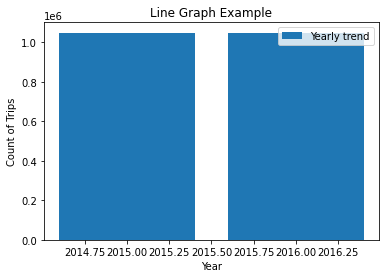

In [29]:
import matplotlib.pyplot as plt
import pandas


x= n_trips_of_year.toPandas()['Year'].values.tolist()

y= n_trips_of_year.toPandas()["count"].values.tolist()

plt.bar(x , y  , label="Yearly trend")
plt.plot()

plt.xlabel("Year")
plt.ylabel("Count of Trips")
plt.title("Line Graph Example")
plt.legend()
plt.show()

**Number of Trips in months**

In [31]:
n_trips_month = unionDF.groupby(unionDF["month"]).count()
n_trips_month.show(2)

+-----+------+
|month| count|
+-----+------+
|    1|363483|
|    6|361203|
+-----+------+
only showing top 2 rows



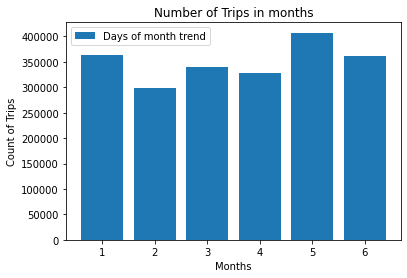

In [40]:
import matplotlib.pyplot as plt
import pandas


x= n_trips_month.toPandas()['month'].values.tolist()

y= n_trips_month.toPandas()["count"].values.tolist()

plt.bar(x , y  , label="Days of month trend")
plt.plot()

plt.xlabel("Months")
plt.ylabel("Count of Trips")
plt.title("Number of Trips in months")
plt.legend()
plt.show()

**Number of Trips in days of months**

In [34]:
n_trips_of_day = unionDF.groupby('day').count()
n_trips_of_day.show(2)

+---+-----+
|day|count|
+---+-----+
| 31|52778|
| 28|80293|
+---+-----+
only showing top 2 rows



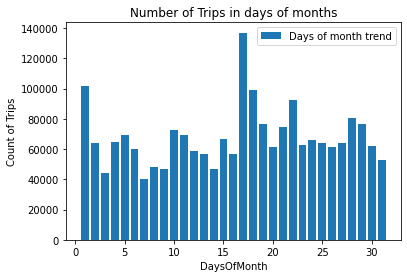

In [41]:
import matplotlib.pyplot as plt
import pandas


x= n_trips_of_day.toPandas()['day'].values.tolist()

y= n_trips_of_day.toPandas()["count"].values.tolist()

plt.bar(x , y  , label="Days of month trend")
plt.plot()

plt.xlabel("DaysOfMonth")
plt.ylabel("Count of Trips")
plt.title("Number of Trips in days of months")
plt.legend()
plt.show()

**Number of Trips in days of week**

In [37]:
n_trips_dayofweek = unionDF.groupby(unionDF["dayofweek"]).count()
n_trips_dayofweek.show(2)

+---------+------+
|dayofweek| count|
+---------+------+
|      Sun|305080|
|      Mon|288227|
+---------+------+
only showing top 2 rows



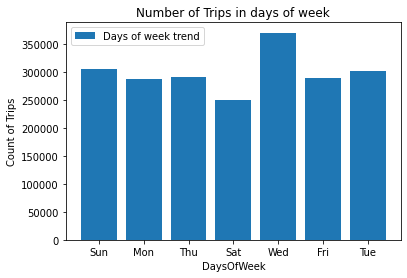

In [42]:
import matplotlib.pyplot as plt
import pandas


x= n_trips_dayofweek.toPandas()['dayofweek'].values.tolist()

y= n_trips_dayofweek.toPandas()["count"].values.tolist()

plt.bar(x , y  , label="Days of week trend")
plt.plot()

plt.xlabel("DaysOfWeek")
plt.ylabel("Count of Trips")
plt.title("Number of Trips in days of week")
plt.legend()
plt.show()